In [1]:
# Place here the same 6-digit number you selected for the first coursework. 
# Make sure that you keep a copy of this number and avoid trivial numbers, such as 000000 or 123456 -- thank you!
170405

170405

# Assignment 2 - Regression and Classification

Second assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This coursework aims to provide students with a comprehensive understanding of linear regression with polynomial basis functions and classification with K-nearest neighbours. Specifically, students will learn about key concepts related to the model's generalisation ability by changing the degree of the polynomial and the size of the dataset. In the second part of the coursework, students will delve into classification using the K-nearest neighbours algorithm. Finally, students will be introduced to the concept of using a validation set to select the optimal value of $K$ for their classification model. By the end of this coursework, students will have gained a solid understanding of these key concepts and be equipped with the skills to apply them in practical scenarios.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Polynomial Fitting Visualisation](#Polynomial-Fitting-Visualisation) (50%)
2. [Classification with KNN](#Classification-with-KNN) (50%)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Polynomial Fitting Visualisation
In this exercise you will explore the effect that the degree of the polynomial and the size of the training data has on the model's performance and generalisation ability.

1. Generate a 2D dataset of 15 points $(x_i,y_i)$ for $i=1..15$ using a sine wave perturbed by a small gaussian noise --- this is very similar to what you did in the lab.
    - The $x_i$ should be equally spaced in the $[0-10]$ interval 
    - Use: $y_i = 4*sin(x_i) + \epsilon$, where $\epsilon$ is gaussian noise (with $\mu=0$ and $\sigma=1$).
    - To ensure reproducibility of your results, use (provided below): 
    `rng = np.random.default_rng(13)` and
    `random_state = np.random.RandomState(13)`
    
2. Split the points randomly into a training and testing sets of size 10 and 5, respectively.
    
3. Learn the weights of the linear regression for  polynomial models of degree $M$ for $M = 0..9$ . For each value of $M$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $M$. Your figure should be similar to Figure 1 from the Coursework document.

4. In the last part of this exercise, you will have to create more points for training (using the same sine wave perturbed by a small gaussian noise as described in point 1). For testing, you will continue to use the same 5 points you used in points 1 to 3. Learn the weights of the linear regression for  polynomial models of degree $M=9$ for training sets of size $N$ with $N=10:500:10$ (that is, from $N=10$ to $N=500$ in steps of $10$). For each value of $N$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $N$. Your figure should be similar to Figure 2 from the Coursework document.

* Note that for parts 3 and 4 you are supposed to write your code from scratch and you cannot use existing functions such as `PolynomialFeatures`, `LinearRegression` or `mean_squared_error`.
* _Observation: in this exercise we are not using the validation set because our goal is not to choose a specific model but rather to analyse the behaviour of the family of models._

### Generate the data

In [3]:
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

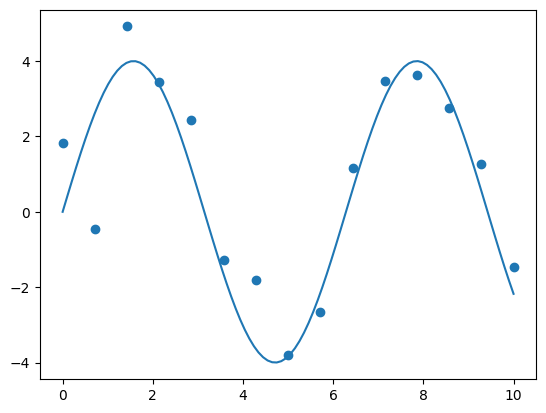

In [4]:
# your code goes here:

# Gerando os dados
X = np.linspace(0, 10, 15)
noise = rng.normal(loc = 0, scale = 1, size = 15)
y = 4 * np.sin(X) + noise

# Gerando dados para o gráfico do seno
x_sin = np.linspace(0, 10, 100)
y_sin = 4 * np.sin(x_sin)

# Plotando os dados
plt.scatter(X, y)
plt.plot(x_sin, y_sin)
plt.show()

### Split the points into training and testing
Feel free to use `train_test_split(x, y, test_size = ?, random_state = random_state)`, remember to calculate the right proportion for the `test_size` so that you end up with 5 points in the testing set.

In [5]:
# your code goes here:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = random_state)

### Degree vs. RMSE
Generate the plot (as in __Figure 1__) of the RMSE during training and testing at different values of of the polynomial degree $M$.

In [6]:
# your code goes here:

# Função para calcular a matriz phi com base na função de base polinomial
def apply_polinomial_basis_function(data, degree):
    # Número de dados
    n_of_datapoints = data.shape[0]
    # Inicializando a matriz phi
    phi = np.zeros((n_of_datapoints, degree + 1))

    # Para cada potência...
    for power in range(degree + 1):
        # Salva na coluna correspondente os dados elevados à potência
        phi[:, power] = data ** power

    return phi


# Função para aprender os parâmetros com base na equação normal
def linear_regression_PI(X, y):
    # Calculando a pseudo-inversa da matriz de dados
    pseudo_inverse = np.linalg.inv(X.T @ X) @ X.T
    # Encontrando o vetor w
    w = pseudo_inverse @ y

    return w


# Função para calcular o RMSE
def rmse(y_true, y_pred):
    rmse = np.sqrt((np.sum((y_true - y_pred)**2))/y_true.size)
    return rmse

In [7]:
# Arrays contendo os RMSEs de treino e de teste
rmses_train = np.zeros(10)
rmses_test = np.zeros(10)

# Para cada grau de 0 a 9...
for degree in range(10):
    # Gera os modelos polinomiais de treino e de teste
    polynomial_model_train = apply_polinomial_basis_function(X_train, degree)
    polynomial_model_test = apply_polinomial_basis_function(X_test, degree)
    # Aprende os parâmetros
    w = linear_regression_PI(polynomial_model_train, y_train)
    # Faz as predições com os conjuntos de treino e de teste
    prediction_train = polynomial_model_train @ w
    prediction_test = polynomial_model_test @ w
    # Calcula os RMSEs
    rmse_train = rmse(y_train, prediction_train)
    rmse_test = rmse(y_test, prediction_test)
    # Adiciona os erros aos arrays
    rmses_train[degree] = rmse_train
    rmses_test[degree] = rmse_test

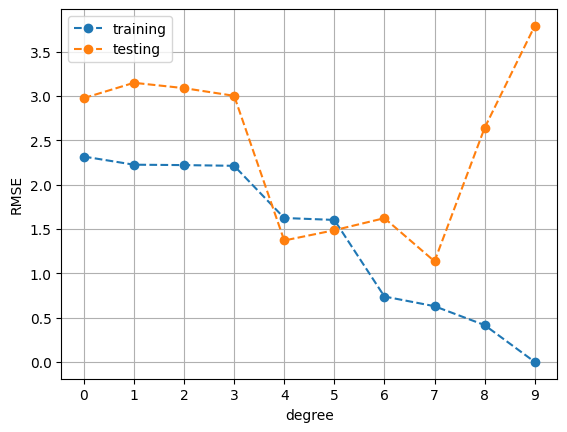

In [8]:
# Plotando o gráfico
plt.plot(range(10), rmses_train, label = "training", linestyle = "--", marker = "o")
plt.plot(range(10), rmses_test, label = "testing", linestyle = "--", marker = "o")
# Ajustando o design
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.xticks(np.linspace(0, 9, 10))
plt.legend()
plt.grid(True)

plt.show()

### Training set size vs. RMSE
Generate the plot (as in __Figure 2__) of the RMSE during training and testing at different training set sizes $N$.

In [9]:
# your code goes here:

# Arrays contendo os RMSEs de treino e de teste
rmses_train = np.zeros(50)
rmses_test = np.zeros(50)

# Gerando o modelo polinomial definitivo para o conjunto de teste
polynomial_model_test = apply_polinomial_basis_function(X_test, 9)

# Para cada quantidade de dados...
for n_of_datapoints in range(10, 501, 10):
    # Gera novos dados
    new_X_train = np.linspace(0, 10, n_of_datapoints)
    new_noise = rng.normal(loc = 0, scale = 1, size = n_of_datapoints)
    new_y_train = 4 * np.sin(new_X_train) + new_noise
    # Gera o modelo polinomial
    polynomial_model_train = apply_polinomial_basis_function(new_X_train, 9)
    # Aprende os parâmetros
    w = linear_regression_PI(polynomial_model_train, new_y_train)
    # Faz as predições com os conjuntos de treino e de teste
    prediction_train = polynomial_model_train @ w
    prediction_test = polynomial_model_test @ w
    # Calcula os RMSEs
    rmse_train = rmse(new_y_train, prediction_train)
    rmse_test = rmse(y_test, prediction_test)
    # Adiciona os erros aos arrays
    rmses_train[int(n_of_datapoints/10 - 1)] = rmse_train
    rmses_test[int(n_of_datapoints/10 - 1)] = rmse_test

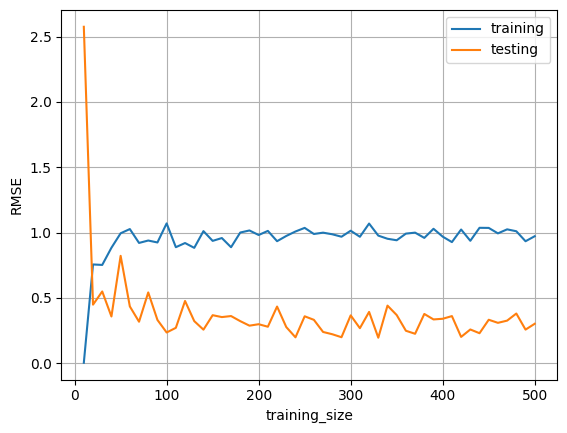

In [10]:
# Plotando o gráfico
plt.plot(range(10, 501, 10), rmses_train, label = "training")
plt.plot(range(10, 501, 10), rmses_test, label = "testing")
# Ajustando o design
plt.xlabel("training_size")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)

plt.show()

# Classification with KNN
In this exercise you will implement the K-nearest neighbours (K-NN) algorithm for multi-class classification and use it to classify the Wine dataset. You will also need to determine the optimal value of $K$ using the accuracy on a validation set and report the test set performance based on the accuracy.

Dataset: The Wine dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset contains 178 observations, with 13 attributes each. There are three different classes of wines.

Specifically:
1. 1.	Load the Wine dataset and split it into a training set ($70\%$), a validation set ($15\%$), and a testing set ($15\%$).
    
2. You will write code that implements the K-NN algorithm for multi-class classification. Use Euclidean distance as the distance metric.
    - _Obs: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours._


3. Use the K-NN algorithm on the training set for a range of values of $K$ and evaluate its performance on the validation set using the accuracy. Plot the accuracy on the validation set against the range of values that were tried for $K$. Your plot should look like Figure 3. 
    - *Observation: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours.*
    - **You will also have to implement the accuracy-score from scratch.**


4. 	Choose the value of $K$ that gives the best accuracy score in point 3 and report the accuracy of the K-NN algorithm on the test set using the selected value of $K$.
	- *Observation: when obtaining the predictions for the testing set, remember to include the validation set in your training set.*



* __Note:__ You are not allowed to use any Python libraries such as scikit-learn to implement the K-NN algorithm or to calculate distances or the accuracy score. You may use numpy or other basic libraries for matrix operations.
    
    

### Preparing the dataset

Load the dataset and generate the training, validation and testing sets.

In [11]:
X_wine = pd.read_csv('X_wine.csv')
y_wine = pd.read_csv('y_wine.csv')

Let's inspect the dataset. There are 13 features and one target column

In [12]:
X_wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We can inspect the class distribution by using `value_counts()` on the target variable

In [13]:
y_wine.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

Now you will write code to split the data into training ($70\%$), validation ($15\%$), and testing ($15\%$). 

You can use `train_test_split()` but make sure to calculate the right proportions and remember that this only returns 2 different sets, not 3.

In [14]:
# set the random_state for reproducibilty of your results
random_state = 113

In [15]:
# your code goes here:

# Dividindo os dados em conjuntos de (treino + validação) e teste
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_wine, y_wine, test_size = 0.15, random_state = random_state)
# Dividindo o conjunto de (treino + validação) em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 3/17, random_state = random_state)

### Here you will implement the KNN algorithm using the euclidean distance

In [16]:
def euclidean_dist(x1, x2):
    # your code goes here:

    # Calculando a distância
    distance = np.sqrt(np.sum((x1 - x2)**2))

    return distance

In [17]:
def knn_predict(X_train, y_train, X_test, k):
    # your code goes here:
    
    # Série com as predições
    predictions = pd.Series()

    # Para cada valor do conjunto a ser previsto...
    for index_test, features_test in X_test.iterrows():
        # Transforma seus dados em um array
        datapoint_test = np.array(features_test.values)
        # Cria uma série para armazenar a distância a cada ponto do conjunto de treino
        distances = pd.Series()
        # Para cada ponto de treino...
        for index_train, features_train in X_train.iterrows():
            # Transforma também seus dados em um array
            datapoint_train = np.array(features_train.values)
            # Calcula a distância entre ele e o ponto a ser previsto
            distance = euclidean_dist(datapoint_test, datapoint_train)
            # Salva na série de distâncias
            distances[index_train] = distance
        # Pega os pontos com as k menores distâncias do ponto a ser previsto
        k_nearest_neighbors = distances.nsmallest(k)
        # Série para armazenar as classes desses vizinhos
        knn_classes = pd.Series()
        # Para cada vizinho...
        for neighbor in k_nearest_neighbors.index:
            # Salva na série sua classe
            knn_classes[neighbor] = y_train.loc[neighbor].values[0]
        # A classe prevista é o valor que mais se repete
        predicted_class = knn_classes.value_counts().index[0]
        # Adicionando a previsão à série
        predictions[index_test] = predicted_class

    return predictions

### Select the optimal $K$ by plotting the accuracy score in the validation set at different values of $K$

First create a function that calculates the accuracy score

In [18]:
def calculate_acc_score(y_true, y_pred):
    # your code goes here:
    
    # Transformando os dados em arrays
    y_true = np.array(y_true.values.reshape(-1))
    y_pred = np.array(y_pred.values.reshape(-1))

    # Comparando os arrays e contando o número de predições verdadeiras
    correct_predictions = np.sum(y_true == y_pred)
    # Calculando a acurácia
    accuracy = correct_predictions/y_true.size

    return accuracy

Generate the plot and select the optimal $K$

In [19]:
# your code goes here:

# Array com as acurácias para cada K
accuracies = np.array([])

# Para cada valor de K...
for k in range(1, 32, 2):
    # Treina o modelo com o conjunto de treino e testa no de validação
    predictions = knn_predict(X_train, y_train, X_val, k)
    # Calcula a acurácia
    accuracy = calculate_acc_score(y_val, predictions)
    # Adiciona a acurácia ao array
    accuracies = np.append(accuracies, accuracy)

# Encontrando o K com maior acurácia
best_k = (np.argmax(accuracies) * 2) + 1

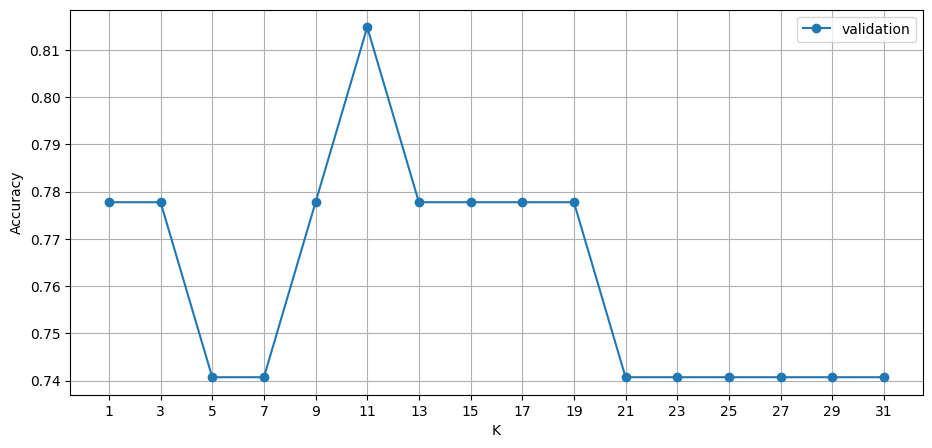

In [20]:
# Plotando o gráfico das acurácias por K
plt.figure(figsize = (11, 5))
plt.plot(range(1, 32, 2), accuracies, marker = "o", label = "validation")

# Ajustando o design
plt.xticks(range(1, 32, 2))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.show()

Calculate the test set performance using the optimal $K$

In [21]:
# your code goes here:

# Treinando com o conjunto de treino unido ao de validação e predizendo o conjunto de teste
predictions_test = knn_predict(X_train_and_val, y_train_and_val, X_test, best_k)
# Calculando a acurácia
accuracy_test = calculate_acc_score(y_test, predictions_test)

print("Acurácia para o conjunto de teste:", accuracy_test)

Acurácia para o conjunto de teste: 0.5925925925925926
